In [3]:

# 📈 Stock Price Prediction using Linear Regression

# 1. Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
ticker = "AAPL"  # Change to any ticker like "TSLA", "GOOG"
start_date = "2020-01-01"
end_date = "2025-05-31"

In [5]:
data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Close']].copy()
data.dropna(inplace=True)


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_21000\1478763395.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [6]:
# 3. Create Feature and Target
data['Prediction'] = data['Close'].shift(-30)  # Predict 30 days ahead
X = np.array(data[['Close']][:-30])  # Remove last 30 rows
y = np.array(data['Prediction'][:-30])

In [7]:
# 4. Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [8]:
# 5. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# 6. Predict and Evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 317.80
R² Score: 0.5126


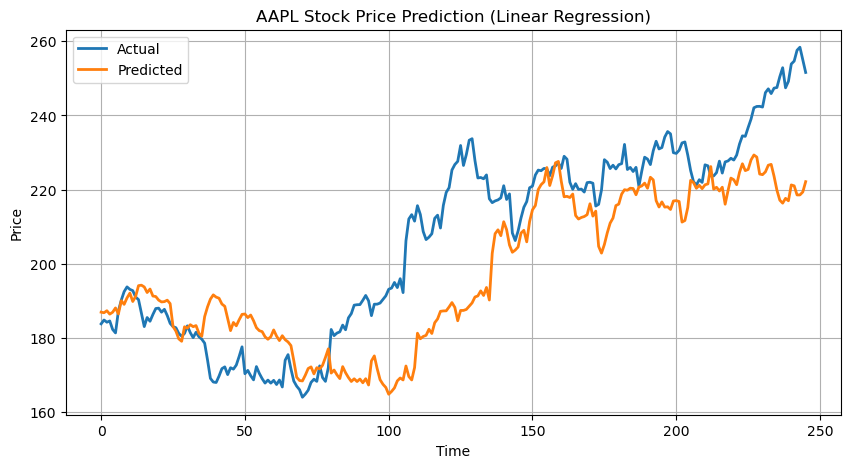

In [10]:
# 7. Plot Predictions vs Actual
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual", linewidth=2)
plt.plot(y_pred, label="Predicted", linewidth=2)
plt.title(f"{ticker} Stock Price Prediction (Linear Regression)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# 8. Forecast Next 30 Days
forecast = model.predict(np.array(data[['Close']][-30:]))
forecast_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=30)

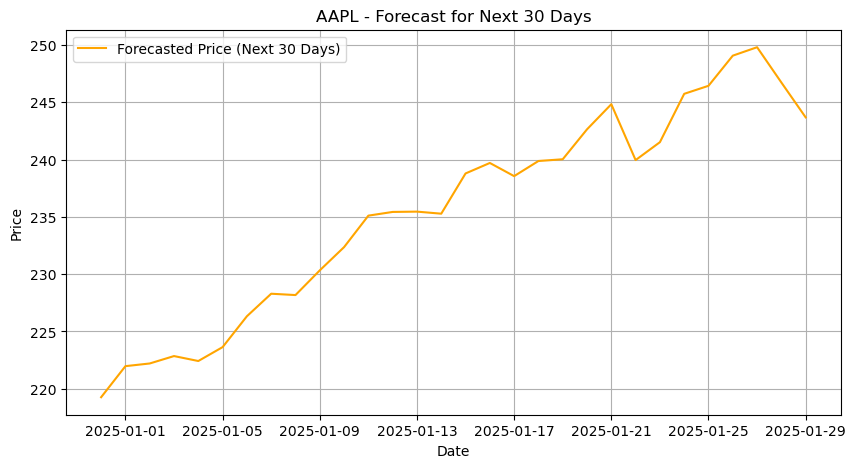

In [12]:
# Plot Forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_dates, forecast, label='Forecasted Price (Next 30 Days)', color='orange')
plt.title(f"{ticker} - Forecast for Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Download data
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
data = data[['Close']].copy()

# Step 2: Add Prediction column
data['Prediction'] = data['Close'].shift(-30)

# 🔁 Step 3: Drop rows where either Close or Prediction is NaN
cleaned = data[['Close', 'Prediction']].dropna()

# 🧪 Check shape
print(f"✅ Cleaned data shape: {cleaned.shape}")

# Step 4: Continue if enough data
if len(cleaned) < 60:
    print("❌ Not enough data to train the model.")
else:
    # Split
    X_rf = np.array(cleaned[['Close']])
    y_rf = np.array(cleaned['Prediction'])

    X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
        X_rf, y_rf, test_size=0.2, shuffle=False
    )

    # Train
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_rf, y_train_rf)

    # Predict and evaluate
    rf_predictions = rf_model.predict(X_test_rf)

    rf_mse = mean_squared_error(y_test_rf, rf_predictions)
    rf_r2 = r2_score(y_test_rf, rf_predictions)

    print(f"📊 MSE: {rf_mse:.2f}")
    print(f"📈 R² Score: {rf_r2:.4f}")


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_21000\740698655.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


✅ Cleaned data shape: (1227, 2)
📊 MSE: 1620.04
📈 R² Score: -1.4847


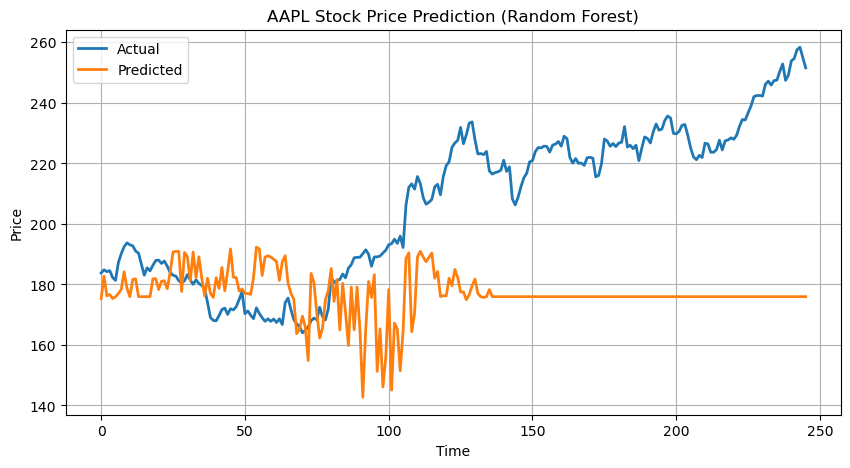

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_rf, label="Actual", linewidth=2)
plt.plot(rf_predictions, label="Predicted", linewidth=2)
plt.title(f"{ticker} Stock Price Prediction (Random Forest)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


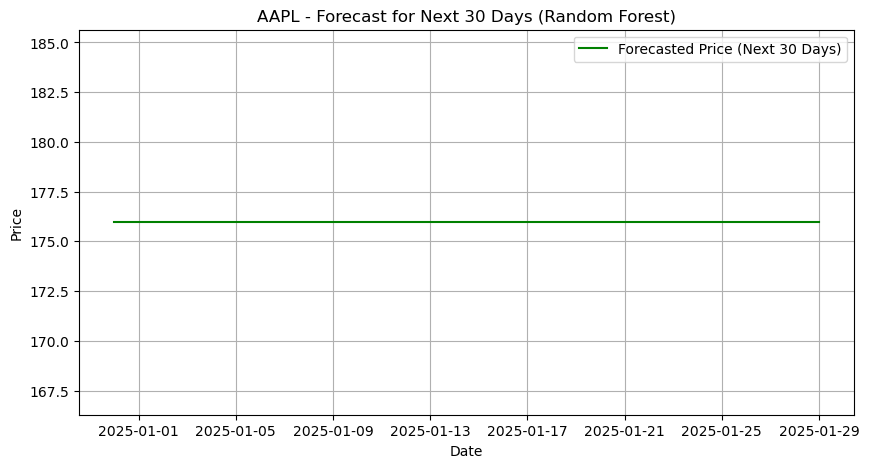

In [21]:
rf_forecast = rf_model.predict(np.array(data[['Close']][-30:]))
forecast_dates_rf = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=30)

# Plot Forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_dates_rf, rf_forecast, label='Forecasted Price (Next 30 Days)', color='green')
plt.title(f"{ticker} - Forecast for Next 30 Days (Random Forest)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()
